In [22]:
import pandas_datareader as pdr
key="842e3cda59286d06936e9d436f635ac8c2ab803b"

In [23]:
df = pdr.get_data_tiingo('GOOGL', api_key=key)

In [24]:
df.to_csv('GOOGL.csv')

In [25]:
import pandas as pd

In [26]:
df=pd.read_csv('GOOGL.csv')

In [27]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2016-09-12 00:00:00+00:00,798.82,800.170,783.50,784.52,1863737,798.82,800.170,783.50,784.52,1863737,0.0,1.0
1,GOOGL,2016-09-13 00:00:00+00:00,788.72,795.790,784.33,794.01,1809044,788.72,795.790,784.33,794.01,1809044,0.0,1.0
2,GOOGL,2016-09-14 00:00:00+00:00,790.46,796.330,787.53,787.53,1313912,790.46,796.330,787.53,787.53,1313912,0.0,1.0
3,GOOGL,2016-09-15 00:00:00+00:00,801.23,803.645,788.66,790.01,1566360,801.23,803.645,788.66,790.01,1566360,0.0,1.0
4,GOOGL,2016-09-16 00:00:00+00:00,797.97,799.020,793.62,799.02,2130571,797.97,799.020,793.62,799.02,2130571,0.0,1.0


In [28]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2021-09-01 00:00:00+00:00,2904.31,2925.075,2897.670,2900.00,1096805,2904.31,2925.075,2897.670,2900.00,1096805,0.0,1.0
1253,GOOGL,2021-09-02 00:00:00+00:00,2865.74,2910.385,2863.695,2904.32,1617907,2865.74,2910.385,2863.695,2904.32,1617907,0.0,1.0
1254,GOOGL,2021-09-03 00:00:00+00:00,2874.79,2883.100,2848.010,2861.61,992718,2874.79,2883.100,2848.010,2861.61,992718,0.0,1.0
1255,GOOGL,2021-09-07 00:00:00+00:00,2885.61,2891.300,2872.380,2876.69,1006595,2885.61,2891.300,2872.380,2876.69,1006595,0.0,1.0
1256,GOOGL,2021-09-08 00:00:00+00:00,2873.82,2888.000,2860.000,2882.00,917511,2873.82,2888.000,2860.000,2882.00,917511,0.0,1.0


In [29]:
df1=df.reset_index()['close']

In [30]:
df1

0        798.82
1        788.72
2        790.46
3        801.23
4        797.97
         ...   
1252    2904.31
1253    2865.74
1254    2874.79
1255    2885.61
1256    2873.82
Name: close, Length: 1257, dtype: float64

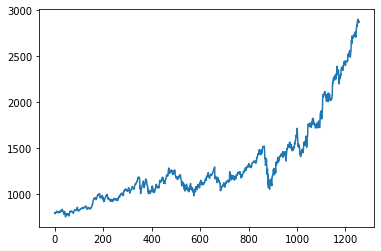

In [31]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [32]:
### LSTM are sensitive to the scale of the data. So We apply MinMax scaler

In [33]:
import numpy as np

In [34]:
df1

0        798.82
1        788.72
2        790.46
3        801.23
4        797.97
         ...   
1252    2904.31
1253    2865.74
1254    2874.79
1255    2885.61
1256    2873.82
Name: close, Length: 1257, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
print(df1)

[[0.02119856]
 [0.01650326]
 [0.01731215]
 ...
 [0.98627672]
 [0.99130673]
 [0.98582579]]


In [37]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(817, 440)

In [39]:
train_data

array([[0.02119856],
       [0.01650326],
       [0.01731215],
       [0.02231892],
       [0.02080341],
       [0.01960401],
       [0.02164484],
       [0.02408546],
       [0.02916196],
       [0.02870173],
       [0.02297905],
       [0.02673528],
       [0.02642381],
       [0.0229744 ],
       [0.02363453],
       [0.02192377],
       [0.02304413],
       [0.02231892],
       [0.02317895],
       [0.02207718],
       [0.02833447],
       [0.02619602],
       [0.02721876],
       [0.02364383],
       [0.02388556],
       [0.0249269 ],
       [0.0317374 ],
       [0.03434073],
       [0.03180248],
       [0.03293214],
       [0.03836195],
       [0.03501946],
       [0.03202098],
       [0.02981279],
       [0.03084018],
       [0.02634943],
       [0.02429466],
       [0.0163638 ],
       [0.01346759],
       [0.01296087],
       [0.02269082],
       [0.02731638],
       [0.0243458 ],
       [0.01258432],
       [0.00861424],
       [0.        ],
       [0.01019948],
       [0.012

In [40]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3,-------,99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3, and Y=t+4
time_step = 100 
X_train, Y_train = create_dataset(train_data, time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [42]:
print(X_train.shape),print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [43]:
print(X_test.shape),print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [44]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [45]:
### Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 302ms/step - loss: 0.0081 - val_loss: 0.0934
Epoch 2/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0017 - val_loss: 0.0424
Epoch 3/100
12/12 [==============================] - 2s 199ms/step - loss: 9.0562e-04 - val_loss: 0.0282
Epoch 4/100
12/12 [==============================] - 2s 201ms/step - loss: 5.2193e-04 - val_loss: 0.0072
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 4.0920e-04 - val_loss: 0.0024
Epoch 6/100
12/12 [==============================] - 2s 207ms/step - loss: 3.6765e-04 - val_loss: 0.0040
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 3.6919e-04 - val_loss: 0.0057
Epoch 8/100
12/12 [==============================] - 2s 197ms/step - loss: 3.4538e-04 - val_loss: 0.0065
Epoch 9/100
12/12 [==============================] - 2s 199ms/step - loss: 3.4223e-04 - val_loss: 0.0049
Epoch 10/100
12/12 [==============================] - 2s 200ms/

In [49]:
import tensorflow as tf


In [50]:
tf.__version__

'2.6.0'

In [51]:
### Prediction and check performence metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
###Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
### Calculate RMSE  performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

1094.9500451714243

In [54]:
###Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

1844.0197703269232

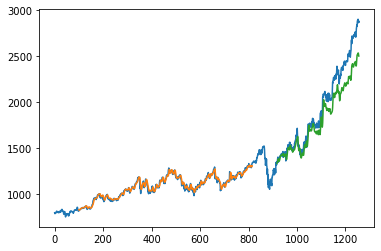

In [55]:
###Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict
#plot baseline and predicitons 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [56]:
len(test_data)

440

In [57]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.7093101636844578,
 0.7090033424914809,
 0.6969954767118064,
 0.7190354657406243,
 0.723684271694815,
 0.7148747844116238,
 0.7465145577358455,
 0.7621903314133766,
 0.7439391192372239,
 0.7390950634329571,
 0.722243141849016,
 0.7259342937766434,
 0.7364312976212058,
 0.7432092567024159,
 0.7152327424700965,
 0.7051494823554568,
 0.6726961679892519,
 0.6860800803313668,
 0.7090172889093437,
 0.7139171303850605,
 0.7016210386362262,
 0.7058189104128604,
 0.7222989275204662,
 0.716339158287194,
 0.7474443189266836,
 0.7482950504163005,
 0.7564025680004091,
 0.7482067231031707,
 0.7454964692318776,
 0.7568070141184234,
 0.7518839286129358,
 0.7411870261123429,
 0.7625668846956658,
 0.7666252922936744,
 0.7648308531953566,
 0.7692472188518379,
 0.7818873222412822,
 0.7795954609058661,
 0.788293376846157,
 0.7787540270281578,
 0.7727384721234348,
 0.7817664532864733,
 0.7665881018460406,
 0.7824079885081515,
 0.7872241514766932,
 0.7853320874533375,
 0.7888000966951637,
 0.78887912639638

In [62]:
### demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    ###print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)

0 day input [0.70900334 0.69699548 0.71903547 0.72368427 0.71487478 0.74651456
 0.76219033 0.74393912 0.73909506 0.72224314 0.72593429 0.7364313
 0.74320926 0.71523274 0.70514948 0.67269617 0.68608008 0.70901729
 0.71391713 0.70162104 0.70581891 0.72229893 0.71633916 0.74744432
 0.74829505 0.75640257 0.74820672 0.74549647 0.75680701 0.75188393
 0.74118703 0.76256688 0.76662529 0.76483085 0.76924722 0.78188732
 0.77959546 0.78829338 0.77875403 0.77273847 0.78176645 0.7665881
 0.78240799 0.78722415 0.78533209 0.7888001  0.78887913 0.78913481
 0.78668489 0.78498343 0.78828408 0.81443826 0.82310828 0.82574881
 0.81245322 0.81686494 0.83041156 0.83381448 0.8421405  0.83068584
 0.83036042 0.80812053 0.82328959 0.83574374 0.84385591 0.88656449
 0.89604805 0.87619765 0.91519183 0.91224914 0.90247735 0.90366744
 0.91087774 0.9061871  0.91665621 0.91188653 0.92280658 0.92182103
 0.91691189 0.92541921 0.93037948 0.93579069 0.92046823 0.90919487
 0.91134262 0.92760879 0.95189416 0.96323724 0.97083

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt


In [65]:
len(df1)

1257

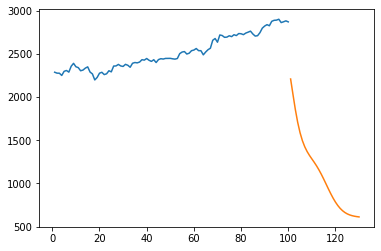

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

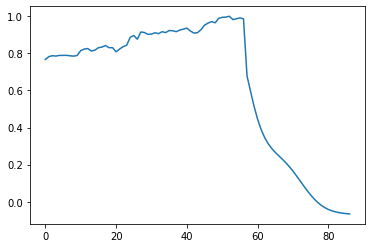

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

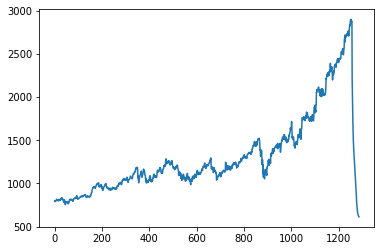

In [73]:
plt.plot(df3)